## Explaining xarray 

### What is xarray? 
xarray is a python package designed for working with mult-dimensional arrays. It can be useful for dealing with meteorological data as we will show below. xarray is an extension of numpy. 

### What are some reasons for using xarray? 
xarray is helpful when dealing with netCDF files. xarray is similar to pandas, however xarray introduces two key data structures, which are: **DataArray** and **Dataset** A **DataArray** is a labled, multi-dimensional array of data, while a **Dataset** is a collection of these data arrays that share the same dimensions. 

### Example of Use with Toy Data: 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import xarray as xr

np.random.seed(123)

xr.set_options(display_style="html")

times = pd.date_range("2000-01-01", "2001-12-31", name="time")
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))

base = 10 + 15 * annual_cycle.reshape(-1, 1)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

ds = xr.Dataset(
    {
        "tmin": (("time", "location"), tmin_values),
        "tmax": (("time", "location"), tmax_values),
    },
    {"time": times, "location": ["IA", "IN", "IL"]},
)

ds

<xarray.Dataset>
Dimensions:   (time: 731, location: 3)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2001-12-31
  * location  (location) <U2 'IA' 'IN' 'IL'
Data variables:
    tmin      (time, location) float64 -8.037 -1.788 -3.932 ... -1.346 -4.544
    tmax      (time, location) float64 12.98 3.31 6.779 ... 6.636 3.343 3.805

We can also use it to plot data and analyze it. For example, let us look at monthly anomalies from our toy data. 

<Axes: xlabel='time'>

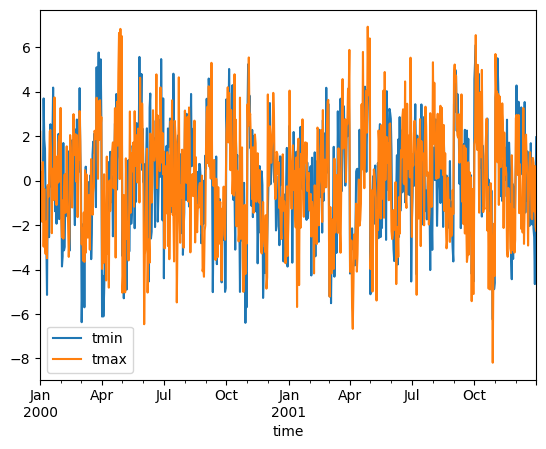

In [3]:
climatology = ds.groupby("time.month").mean("time")
anomalies = ds.groupby("time.month") - climatology
anomalies.mean("location").to_dataframe()[["tmin", "tmax"]].plot()

## Conclusion 
xarray is a powerful tool for working with multi-dimensional data, which is common in Meteorology and other geosciences. We also showed an example of one use of xarray using toy weather data. 